In [2]:
import numpy as np
import pandas as pd
from plotnine import *

/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/latent_cause_delays_.jpeg


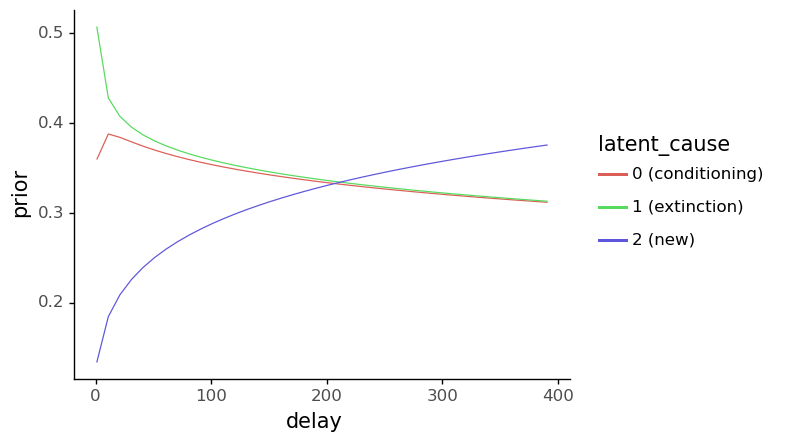

In [11]:
# It is assumed that latent cause 0 (conditioning) was active on the first 5 time steps,
# followed by latent cause 1 (extinction) on the next 5 steps, followed by a delay of varying length.
# 0 = conditioning latent cause; 1 = extinction latent cause; 2 = new latent cause
power = 0.3 # power parameter of sequential CRP prior
alpha = 1.0 # concentration parameter of sequential CRP prior
time0 = np.array([0, 1, 2, 3, 4], dtype = 'float') # times that conditioning latent cause is active
time1 = np.array([5, 6, 7, 8, 9], dtype = 'float') # times that extinction latent cause is active
delays = list(np.arange(start = 1, stop = 400, step = 10)) # delays of varying length
n_d = len(delays) # number of delay
new_time = 9 + np.array(delays, dtype = 'float') # times after the delay

# loop through delays
prior0 = np.zeros(n_d)
prior1 = np.zeros(n_d)
prior2 = np.zeros(n_d)
for i in range(n_d):
    kernel_sum0 = np.sum((new_time[i] - time0)**(-power))
    kernel_sum1 = np.sum((new_time[i] - time1)**(-power))
    denominator = kernel_sum0 + kernel_sum1 + alpha
    prior0[i] = kernel_sum0/denominator # conditioning latent cause
    prior1[i] = kernel_sum1/denominator # extinction latent cause
    prior2[i] = alpha/denominator # new latent cause
df = pd.DataFrame({'prior': np.concatenate([prior0, prior1, prior2]),
                   'latent_cause': n_d*['0 (conditioning)'] + n_d*['1 (extinction)'] + n_d*['2 (new)'],
                   'delay': 3*delays})

plot = ggplot(df, aes(x = 'delay', color = 'latent_cause', y = 'prior'))
plot += geom_line()
plot += theme_classic(base_size = 15)
plot.draw()
plot.save(filename = 'plots/latent_cause_delays_' + '.jpeg', dpi = 300)